In [1]:
import os, time, h5py, platform, json, sys
sys.path.append("/Users/gkoolstra/Documents/Code")
from matplotlib import pyplot as plt
from shutil import copyfile
import numpy as np
from tqdm import tqdm
from scipy.optimize import minimize
from termcolor import cprint
from Common import common, kfit
from TrapAnalysis import trap_analysis, artificial_anneal as anneal
%matplotlib inline
%config InlineBackend.figure_format='retina'

Double, passive low pass filter. 

# $R = 100 \Omega$, $C = 3 \cdot 0.47 \mu$F

In [6]:
def transf_function(fpts, R=100, C=3*0.40E-6):
    return np.abs(1/(1 + 1j*2*np.pi*fpts * R * C))**2

Cut-off frequency =  1326.2911924324612
Johnson noise from filter resistance within 2 fc =  1.71127173555e-08


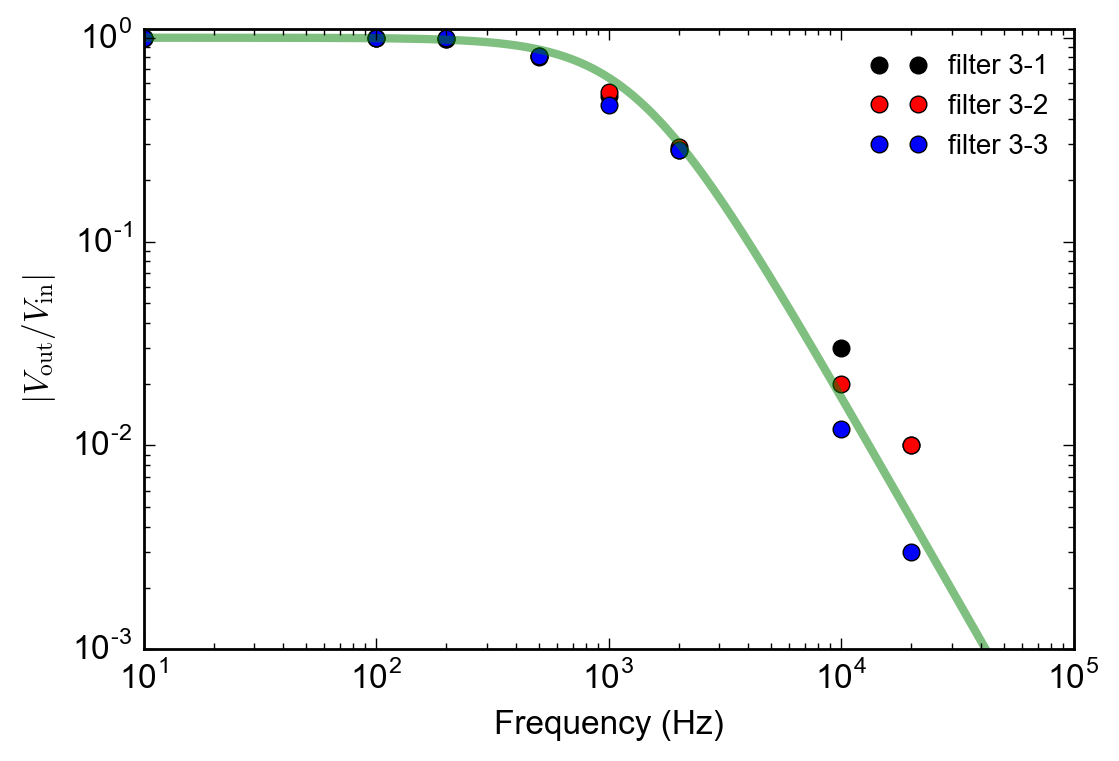

In [15]:
excitation_amp = 100E-3
fpts = np.array([1E1, 1E2, 2E2, 5E2, 1E3, 2E3, 10E3, 20E3])
f = np.logspace(1, 5, 1E3)
meas_amp_1 = np.array([100E-3, 100E-3, 80E-3, 52E-3, 30E-3, 12E-3, 1E-3, 0.5E-3])

meas_amp_3_1 = np.array([100E-3, 100E-3, 98E-3, 80E-3, 52E-3, 28E-3, 3E-3, 1E-3])
meas_amp_3_2 = np.array([100E-3, 100E-3, 99E-3, 81E-3, 54E-3, 29E-3, 2E-3, 1E-3])
meas_amp_3_3 = np.array([100E-3, 100E-3, 100E-3, 81E-3, 47E-3, 28E-3, 1.2E-3, 0.3E-3])

fig = plt.figure()
common.configure_axes(12)
plt.plot(fpts, meas_amp_3_1/excitation_amp, 'ok', label="filter 3-1")
plt.plot(fpts, meas_amp_3_2/excitation_amp, 'or', label="filter 3-2")
plt.plot(fpts, meas_amp_3_3/excitation_amp, 'ob', label="filter 3-3")

plt.plot(f, transf_function(f), '-g', lw=3, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1E-3, 1.1)
plt.ylabel("$|V_\mathrm{out}/V_\mathrm{in}|$")
plt.xlabel("Frequency (Hz)")
plt.legend(loc=0, frameon=False, prop={"size" : 10})

print("Cut-off frequency = ", (1/(2*np.pi*100*3*0.40E-6)))
print("Johnson noise from filter resistance within 2 fc = ", (np.sqrt(4 * 1.38E-23 * 200E-3 * 2/(2*np.pi*100*3*0.40E-6)) * 100))

# common.save_figure(fig, save_path=r"/Volumes/slab/_Data/170422 - EonHe M018V6 with L3 etch/data/170927")

# $R = 100 \Omega$, $C = 4 \cdot 0.47 \mu$F


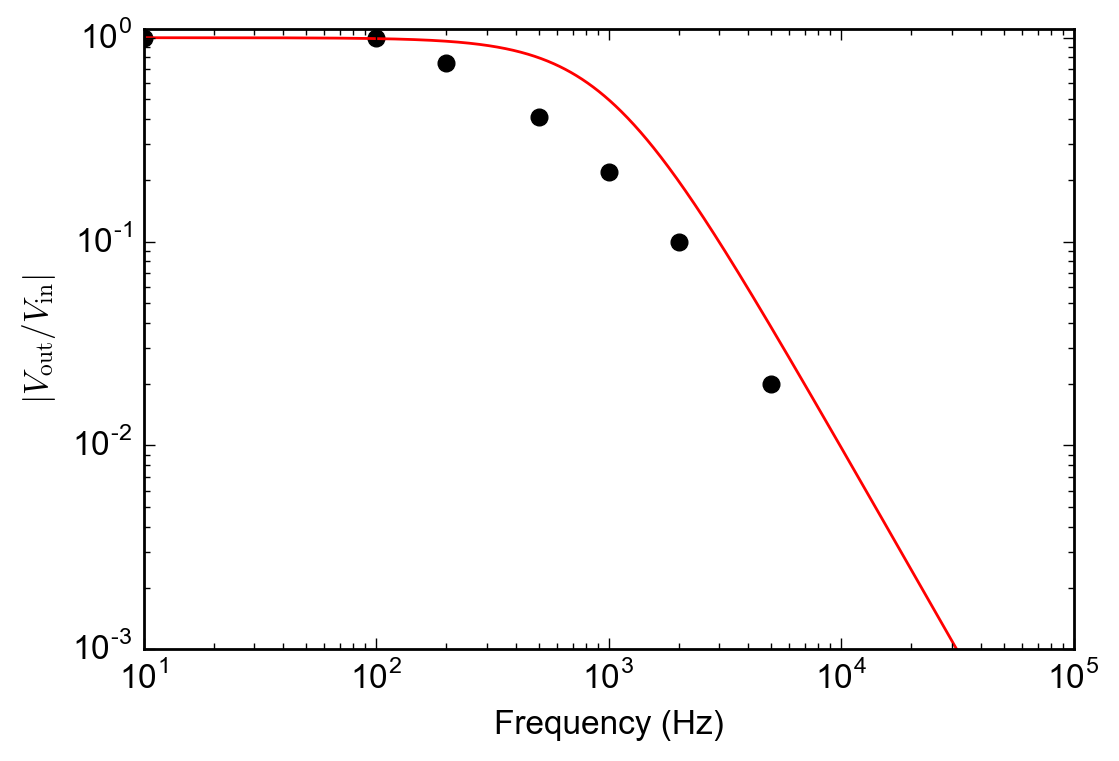

In [26]:
excitation_amp = 100E-3
fpts = np.array([1E1, 1E2, 2E2, 5E2, 1E3, 2E3, 5E3])
f = np.logspace(1, 5, 1E3)
meas_amp = np.array([100E-3, 100E-3, 75E-3, 41E-3, 22E-3, 10E-3, 2E-3])

plt.figure()
common.configure_axes(12)
plt.plot(fpts, meas_amp/excitation_amp, 'ok')
plt.plot(f, transf_function(f, R=100, C=4*0.40E-6), '-r')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1E-3, 1.1)
plt.ylabel("$|V_\mathrm{out}/V_\mathrm{in}|$")
plt.xlabel("Frequency (Hz)")